# Soccer Prophet: Machine Learning Techniques for Accurate Match Predictions

### By: Roman Kovalchuk

## Part 1: Cleaning, Exploratory Data Analysis, and Feature Engineering

## Table of Contents:
* [Introduction](#Introduction)
* [Notebook Introduction](#Notebook)
* [Data Dictionary](#dictionary)
* [Importing Data and Preliminary Analysis](#importing)
* [Checking Nulls](#checking)
* [Dealing With Nulls](#Dealing)
* [Cleaning up Leagues](#Leagues)
* [Exploratory Data Analysis](#Exploratory)
* [Visualizing Numerical Variables](#numerical)
* [Visualizing Categorical Variables](#categorical)
* [Visualizing Target Variable Result](#result)
* [Visualizing Team Performance](#teams)
* [Feature Engineering](#feature)
* [Extracting Date](#date)
* [Creating Dummy Variables from HomeTeam](#home)
* [Creating Dummy Variables from AwayTeam](#away)
* [Creating Dummy Variables with Seasons](#season)
* [Creating Dummy Variables with Countries](#country)
* [Creating Form Category](#form)
* [Creating DrawsInLast3 Category](#draws)
* [Grouping Season into PartsOfSeason](#parts)
* [Notebook Conclusion](#conclusion)

## Introduction<a class="anchor" id="Introduction"></a>

Soccer Prophet is a machine learning algorithm that aims to forecast the results of soccer matches based on historical data and past performance. With over 3.5 billion fans worldwide and continuously growing popularity, accurate predictions can be beneficial to betting companies, team management, and fans

Soccer Prophet will analyse match data including past game metrics such as shots, shots on target, and yellow cards and apply these to machine learning algorithms to make accurate predictions. In the real world, bookies can use the model’s predictions to adjust odds and maximize profits, clubs can use the predictions to select lineups, make tactical adjustments and improve performance, and fans can benefit by making more informed gambling decision when placing bets to enhance enjoyment.

## Notebook Introduction<a class="anchor" id="Notebook"></a>

In this notebook, we will clean, visualize, and engineer features that will help tailor our dataset to making accurate predictions. We will first remove null values and then visualize key variables to determine how our target variable, `Result`, will be impacted by them. Afterwards, we will engineer a few features that will hopefully improve our model's accuracy. Let's take a look at the Data Dictionary:

## Data Dictionary<a class="anchor" id="dictionary"></a>

- `Country` = Team Country
- `League` = Team League
- `Div` = League Division
- `Season` = Season (2017-2018, 2018-2019, etc)
- `Date` = Match Date (dd/mm/yy)
- `HomeTeam` = Home Team
- `AwayTeam` = Away Team
- `FTHG` = Full Time Home Team Goals
- `FTAG` = Full Time Away Team Goals
- `FTR` = Full Time Result (H=Home Win, D=Draw, A=Away Win)
- `HTHG` = Half Time Home Team Goals
- `HTAG` = Half Time Away Team Goals
- `HTR` = Half Time Result (H=Home Win, D=Draw, A=Away Win)
- `Referee` = Match Referee
- `HS` = Home Team Shots
- `AS` = Away Team Shots
- `HST` = Home Team Shots on Target
- `AST` = Away Team Shots on Target
- `HC` = Home Team Corners
- `AC` = Away Team Corners
- `HF` = Home Team Fouls Committed
- `AF` = Away Team Fouls Committed
- `HY` = Home Team Yellow Cards
- `AY` = Away Team Yellow Cards
- `HR` = Home Team Red Cards
- `AR` = Away Team Red Cards

Let's import the libraries that we will be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data and Preliminary Analysis<a class="anchor" id="importing"></a>

Now let's import the data:

In [2]:
#importing data
data = pd.read_csv("Euro-Football_2012-2023.csv")

Let's make sure that everything imported correctly by checking the first 5 rows:

In [3]:
#checking first 5 rows
data.head()

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,FTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,dkkXCXT5QHMYiCvDBUCJQC,England,Premier League,E0,2012-2013,18/08/12,Arsenal,Sunderland,C Foy,0.0,...,4.0,2.0,12.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1,dAmonz9YM7qKwwvBsSoJo5,England,Premier League,E0,2012-2013,18/08/12,Fulham,Norwich,M Oliver,5.0,...,9.0,2.0,12.0,11.0,6.0,3.0,0.0,0.0,0.0,0.0
2,YwUhmYU4naswHgTHQgNDaW,England,Premier League,E0,2012-2013,18/08/12,Newcastle,Tottenham,M Atkinson,2.0,...,4.0,6.0,12.0,8.0,3.0,5.0,2.0,2.0,0.0,0.0
3,iEk9YuADjHNVFduiEEHXSK,England,Premier League,E0,2012-2013,18/08/12,QPR,Swansea,L Probert,0.0,...,11.0,8.0,11.0,14.0,5.0,3.0,2.0,2.0,0.0,0.0
4,bLQW9sPVeiPZA5bJN2jpW8,England,Premier League,E0,2012-2013,18/08/12,Reading,Stoke,K Friend,1.0,...,3.0,3.0,9.0,14.0,4.0,3.0,2.0,4.0,0.0,1.0


In [4]:
#checking shape
print(f'The shape of the dataset is {data.shape[0]} rows and {data.shape[1]} columns')

The shape of the dataset is 231379 rows and 27 columns


Everything looks good, now let's check the columns:

In [5]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR'],
      dtype='object')


The columns can be unclear in the abbreviations so we can rename them to reduce confusion:

In [6]:
#renaming the columns to be more clear
data = data.rename(columns={'FTR': 'Result'})
data = data.rename(columns={'HTR': 'HalfTimeResult'})
data = data.rename(columns={'FTHG': 'HomeScore'})
data = data.rename(columns={'FTAG': 'AwayScore'})
data = data.rename(columns={'HTHG': 'HalfTimeHomeGoals'})
data = data.rename(columns={'HTAG': 'HalfTimeAwayGoals'})
data = data.rename(columns={'HS': 'HomeShots'})
data = data.rename(columns={'AS': 'AwayShots'})
data = data.rename(columns={'HST': 'HomeShotsOnTarget'})
data = data.rename(columns={'AST': 'AwayShotsOnTarget'})
data = data.rename(columns={'HF': 'HomeFouls'})
data = data.rename(columns={'AF': 'AwayFouls'})
data = data.rename(columns={'HF': 'HomeCorners'})
data = data.rename(columns={'AF': 'AwayCorners'})
data = data.rename(columns={'HC': 'HomeCorners'})
data = data.rename(columns={'AC': 'AwayCorners'})
data = data.rename(columns={'HY': 'HomeYellowCards'})
data = data.rename(columns={'AY': 'AwayYellowCards'})
data = data.rename(columns={'HR': 'HomeRedCards'})
data = data.rename(columns={'AR': 'AwayRedCards'})

In [7]:
print(data.columns)

Index(['id', 'Country', 'League', 'Div', 'Season', 'Date', 'HomeTeam',
       'AwayTeam', 'Referee', 'HomeScore', 'AwayScore', 'Result',
       'HalfTimeHomeGoals', 'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeFouls',
       'AwayFouls', 'HomeCorners', 'AwayCorners', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')


That's better. Now let's check the data types of our columns:

In [8]:
#checking data types
data.dtypes

id                    object
Country               object
League                object
Div                   object
Season                object
Date                  object
HomeTeam              object
AwayTeam              object
Referee               object
HomeScore            float64
AwayScore            float64
Result                object
HalfTimeHomeGoals    float64
HalfTimeAwayGoals    float64
HalfTimeResult        object
HomeShots            float64
AwayShots            float64
HomeShotsOnTarget    float64
AwayShotsOnTarget    float64
HomeFouls            float64
AwayFouls            float64
HomeCorners          float64
AwayCorners          float64
HomeYellowCards      float64
AwayYellowCards      float64
HomeRedCards         float64
AwayRedCards         float64
dtype: object

Most of our columns are floats, which will be useful for modeling. The `Result` and `HalfTimeResult` columns are objects which will need to be split into dummy or ternary columns for Home Win, Away Win or Draw. The date is an object, so we can convert it to `datetime` format:

In [9]:
#convert data to datetime
data["Date"] = pd.to_datetime(data["Date"])

/var/folders/n4/dk0kn6092fg4rgl4rgty93tr0000gn/T/ipykernel_7480/1728442683.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = pd.to_datetime(data["Date"])


In [10]:
#checking number of teams in each country
data.Country.value_counts()

England        37980
Spain          32856
Italy          30508
France         29624
Germany        23724
Scotland       16794
Belgium        13261
Turkey         12696
Netherlands    12186
Portugal       11721
Greece         10029
Name: Country, dtype: int64

## Checking Nulls<a class="anchor" id="checking"></a>

In [11]:
#checking nulls
data.isnull().sum()

id                        0
Country                   0
League                    0
Div                     105
Season                    0
Date                    105
HomeTeam                105
AwayTeam                105
Referee              178290
HomeScore               107
AwayScore               107
Result                  107
HalfTimeHomeGoals       165
HalfTimeAwayGoals       165
HalfTimeResult          165
HomeShots            145750
AwayShots            145750
HomeShotsOnTarget    145750
AwayShotsOnTarget    145750
HomeFouls            147088
AwayFouls            147088
HomeCorners          145750
AwayCorners          145750
HomeYellowCards      145750
AwayYellowCards      145749
HomeRedCards         145749
AwayRedCards         145750
dtype: int64

We have over 178000 nulls in the Referee category and over 145000 in the others. Let's see how many unique teams we have in our dataset.

In [12]:
#checking Away unique teams 
data.AwayTeam.nunique()

474

In [13]:
#checking Home unique teams
data.HomeTeam.nunique()

473

We have 474 teams in the Away column and 473 in Home. This is a large amount of teams which we will probably have to shorten for our modeling dataset. Now let's explore our leagues:

In [14]:
#checking leagues
data.League.value_counts()

Premier League       23881
Championship         23469
Segunda Division     18836
Serie B              16041
Le Championnat       14831
Division 2           14793
Serie A              14467
Primera Division     14020
Jupiler League       13261
Futbol Ligi 1        12696
Eredivisie           12186
Bundesliga 1         11862
Bundesliga 2         11862
Liga I               11721
Ethniki Katigoria    10029
Division 1            7424
Name: League, dtype: int64

We have 16 Leagues which explains the amount of teams in the dataset. Considering each league has 20-30 teams, we can go ahead and drop the less popular leagues and see if it reduces our null values.

In [15]:
#dropping unneeded leagues. they consist of leagues which are less popular/competitive as well as second divisions.
#we will be keeping English second division "Championship" as it is more competitive and contains plenty of data. 
#it also overlaps with (arguably) the top league in the world, "English Premier League", which is why the 
data = data.drop(data[data['League'] == 'Serie B'].index)
data = data.drop(data[data['League'] == 'Division 2'].index)
data = data.drop(data[data['League'] == 'Segunda Division'].index)
data = data.drop(data[data['League'] == 'Ethniki Katigoria'].index)
data = data.drop(data[data['League'] == 'Division 1'].index)
data = data.drop(data[data['League'] == 'Liga I'].index)
data = data.drop(data[data['League'] == 'Futbol Ligi 1'].index)
data = data.drop(data[data['League'] == 'Bundesliga 2'].index)
data = data.drop(data[data['League'] == 'Jupiler League'].index)
data = data.drop(data[data['League'] == 'Eredivisie'].index)
data = data.drop(data[data['Country'] == 'Scotland'].index)
data = data.drop(data[data['League'] == 'Championship'].index)

#dropping seasons which contain the majority of nulls
data1 = data[data['Season'] != '2022-2023']
data1 = data1[data1['Season'] != '2012-2013']

We dropped most of the less popular leagues which contained a lot of null values. Let's see how many we're left with:

In [16]:
#checking nulls
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      5
Season                   0
Date                     5
HomeTeam                 5
AwayTeam                 5
Referee              12918
HomeScore                5
AwayScore                5
Result                   5
HalfTimeHomeGoals        7
HalfTimeAwayGoals        7
HalfTimeResult           7
HomeShots                6
AwayShots                6
HomeShotsOnTarget        6
AwayShotsOnTarget        6
HomeFouls                6
AwayFouls                6
HomeCorners              6
AwayCorners              6
HomeYellowCards          7
AwayYellowCards          6
HomeRedCards             6
AwayRedCards             6
dtype: int64

Great, we've reduced 99% of our nulls. The Referees we will split into a separate dataset and we will drop that column once we do that. The remaining nulls we can fill in manually. Let's quickly check for duplicate values:

In [17]:
#checking duplcaites
data1.duplicated().sum()

0

Fortunately there are no duplicates so let's work on the nulls.

## Dealing with Nulls<a class="anchor" id="Dealing"></a>

In [18]:
#checking nulls
null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
1140,K59rLz9hFEEb9qDGVoMKh6,England,Premier League,NaN,2014-2015,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19934,P4VMgAC7TXfGCdbH7L8ezr,Italy,Serie A,NaN,2014-2015,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20315,iVxkPFmAmfYDVw4nmFm79A,Italy,Serie A,NaN,2015-2016,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
34520,K2PRVLLenoj3Bz3b8jHReX,France,Le Championnat,NaN,2013-2014,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35281,7wbKrrsBQJZd2U4QnVAQqk,France,Le Championnat,NaN,2015-2016,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looking at the `HalfTimeResult` null values, we now have 7 rows that contain nulls and most of them don't have any `HomeTeam` and `AwayTeam` match data which means they don't carry any meaningful information. We can safely drop these rows.

In [19]:
#dropping HomeTeam nulls
data1.dropna(subset=['HomeTeam'], inplace=True)

Let's check the remaining matches:

In [20]:
#checking nulls
null_rows = data1[data1['HomeYellowCards'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
19801,85bxANfeUeuKvF8DdZs98S,Italy,Serie A,I1,2014-2015,2015-02-03,Roma,Juventus,NaN,1.0,...,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the Roma - Juventus match, we can fill in the yellow cards and referee value by looking up the match online:

In [21]:
#filling in yellow cards and referee
data1.loc[data1['id'] == '85bxANfeUeuKvF8DdZs98S', 'HomeYellowCards'] = 6.0
data1.loc[data1['id'] == '85bxANfeUeuKvF8DdZs98S', 'Referee'] = "D Orsato"

#checking null values
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12912
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        2
HalfTimeAwayGoals        2
HalfTimeResult           2
HomeShots                1
AwayShots                1
HomeShotsOnTarget        1
AwayShotsOnTarget        1
HomeFouls                1
AwayFouls                1
HomeCorners              1
AwayCorners              1
HomeYellowCards          1
AwayYellowCards          1
HomeRedCards             1
AwayRedCards             1
dtype: int64

Only a few more to go.

In [22]:
#checking halftimeresult 
null_rows = data1[data1['HalfTimeResult'].isnull()]
null_rows

,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,Referee,HomeScore,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
20333,ZbJYChxQ6C8S7G7ZzxzzRN,Italy,Serie A,I1,2016-2017,2016-08-28,Sassuolo,Pescara,NaN,0.0,...,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
35607,iqAVaVrUuFEun4TDgA6EKj,France,Le Championnat,F1,2016-2017,2017-04-16,Bastia,Lyon,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can fill in the missing values for the Sassuolo - Pescara match the same way.

In [23]:
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeHomeGoals'] = 1.0
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeAwayGoals'] = 0.0
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'HalfTimeResult'] = "Home"
data1.loc[data1['id'] == 'ZbJYChxQ6C8S7G7ZzxzzRN', 'Referee'] = "P Tagliavento"

The Bastia vs Lyon match was abandoned at half-time when the Bastia fans threatened Lyon players, so we can drop it from out dataset.[<sup>1</sup>](#fn1)

In [24]:
#dropping Bastia vs Lyon
data1 = data1.drop(data1[data1['id'] == 'iqAVaVrUuFEun4TDgA6EKj'].index)

In [25]:
data1.isnull().sum()

id                       0
Country                  0
League                   0
Div                      0
Season                   0
Date                     0
HomeTeam                 0
AwayTeam                 0
Referee              12910
HomeScore                0
AwayScore                0
Result                   0
HalfTimeHomeGoals        0
HalfTimeAwayGoals        0
HalfTimeResult           0
HomeShots                0
AwayShots                0
HomeShotsOnTarget        0
AwayShotsOnTarget        0
HomeFouls                0
AwayFouls                0
HomeCorners              0
AwayCorners              0
HomeYellowCards          0
AwayYellowCards          0
HomeRedCards             0
AwayRedCards             0
dtype: int64

Great, we've taken care of the all the nulls in terms of match features. Our only nulls remain in the referee set. We will split the matches with `Referee` info into their own category and then delete the `Referee` column from our main dataset.

In [26]:
#checking referee nulls
referees_data = data1[data1['Referee'].notnull()]
referees_data.isnull().sum()

id                   0
Country              0
League               0
Div                  0
Season               0
Date                 0
HomeTeam             0
AwayTeam             0
Referee              0
HomeScore            0
AwayScore            0
Result               0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeFouls            0
AwayFouls            0
HomeCorners          0
AwayCorners          0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [27]:
#dropping referees from main
data1 = data1.drop('Referee', axis=1)

In [28]:
#saving Referees data
referees_data.to_csv('Euro_Football_Referees.csv', index=False)

Now that the nulls have been sorted, let's check the shape of our new dataset:

In [29]:
#checking new shape
print(f'The shape of the dataset is {data1.shape[0]} rows and {data1.shape[1]} columns')

The shape of the dataset is 16332 rows and 26 columns


## Cleaning up `Leagues`<a class="anchor" id="Leagues"></a>

In [30]:
#checking leagues
data1['League'].value_counts()

Premier League      3420
Primera Division    3420
Serie A             3420
Le Championnat      3318
Bundesliga 1        2754
Name: League, dtype: int64

In [31]:
#percentages
data1['League'].value_counts() / len(data1) * 100

Premier League      20.940485
Primera Division    20.940485
Serie A             20.940485
Le Championnat      20.315944
Bundesliga 1        16.862601
Name: League, dtype: float64

Now that we've finished cleaning the data, let's make a copy of it and begin Exploratory Data Analysis

In [32]:
#making a copy of the clean data for exploration
clean_data = data1.copy()


[<sup id="fn1">1</sup>](#fn1-back)https://www.theguardian.com/football/2017/apr/16/lyon-players-bastia-supporters-invade-pitch

## Exploratory Data Analysis<a class="anchor" id="Exploratory"></a>

In [33]:
#analyzing numerical columns
clean_data.describe()

,HomeScore,AwayScore,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeFouls,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000,16332.000000
mean,1.539309,1.210201,0.677504,0.532880,13.524920,11.059393,4.841661,3.969569,12.779451,13.081374,5.512430,4.471528,1.913728,2.142297,0.090926,0.116765
std,1.309676,1.171200,0.833019,0.740434,5.201263,4.613255,2.620982,2.333027,4.150892,4.253774,2.947134,2.612361,1.344505,1.377836,0.303872,0.341300
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,13.000000,13.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,15.000000,16.000000,7.000000,6.000000,3.000000,3.000000,0.000000,0.000000
max,10.000000,9.000000,6.000000,6.000000,46.000000,35.000000,18.000000,20.000000,33.000000,32.000000,22.000000,19.000000,8.000000,9.000000,3.000000,3.000000


There are several observations we can make from these numbers:

- Home teams tend to score more goals than away teams, as the mean `HomeScore` is higher than the mean `AwayScore`.

- The number of goals scored in the first half tends to be lower than the number of goals scored in the entire match, as the mean `HalfTimeHomeGoals` and `HalfTimeAwayGoals` are both lower than the mean `HomeScore` and `AwayScore`. This means that we probably won't be able to use the `HalfTimeGoals` features in our model.

- Home teams tend to take more shots and shots on target than away teams, as the mean `HomeShots`, `HomeShotsOnTarget`, and `HomeCorners` are all higher than the corresponding means for away teams. A Home team advantage likely persists.

- There is a similar number of fouls committed by both home and away teams, as the mean `HomeFouls` and `AwayFouls` are relatively close.

- The number of yellow and red cards issued to each team is relatively low, as the mean `HomeYellowCards`, `AwayYellowCards`, `HomeRedCards`, and `AwayRedCards` are all less than 1. These variables probably won't be as predictive for our model.

## Visualizing numerical variables<a class="anchor" id="numerical"></a>

Now let's take a look at the numerical variables in our dataset:

In [34]:
#selecting numericals
clean_data.select_dtypes("number").columns

Index(['HomeScore', 'AwayScore', 'HalfTimeHomeGoals', 'HalfTimeAwayGoals',
       'HomeShots', 'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget',
       'HomeFouls', 'AwayFouls', 'HomeCorners', 'AwayCorners',
       'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [35]:
#changing the style of the plot
plt.style.use("ggplot")
plt.rcParams["text.color"] = "black"
plt.rcParams["axes.labelcolor"] = "black"

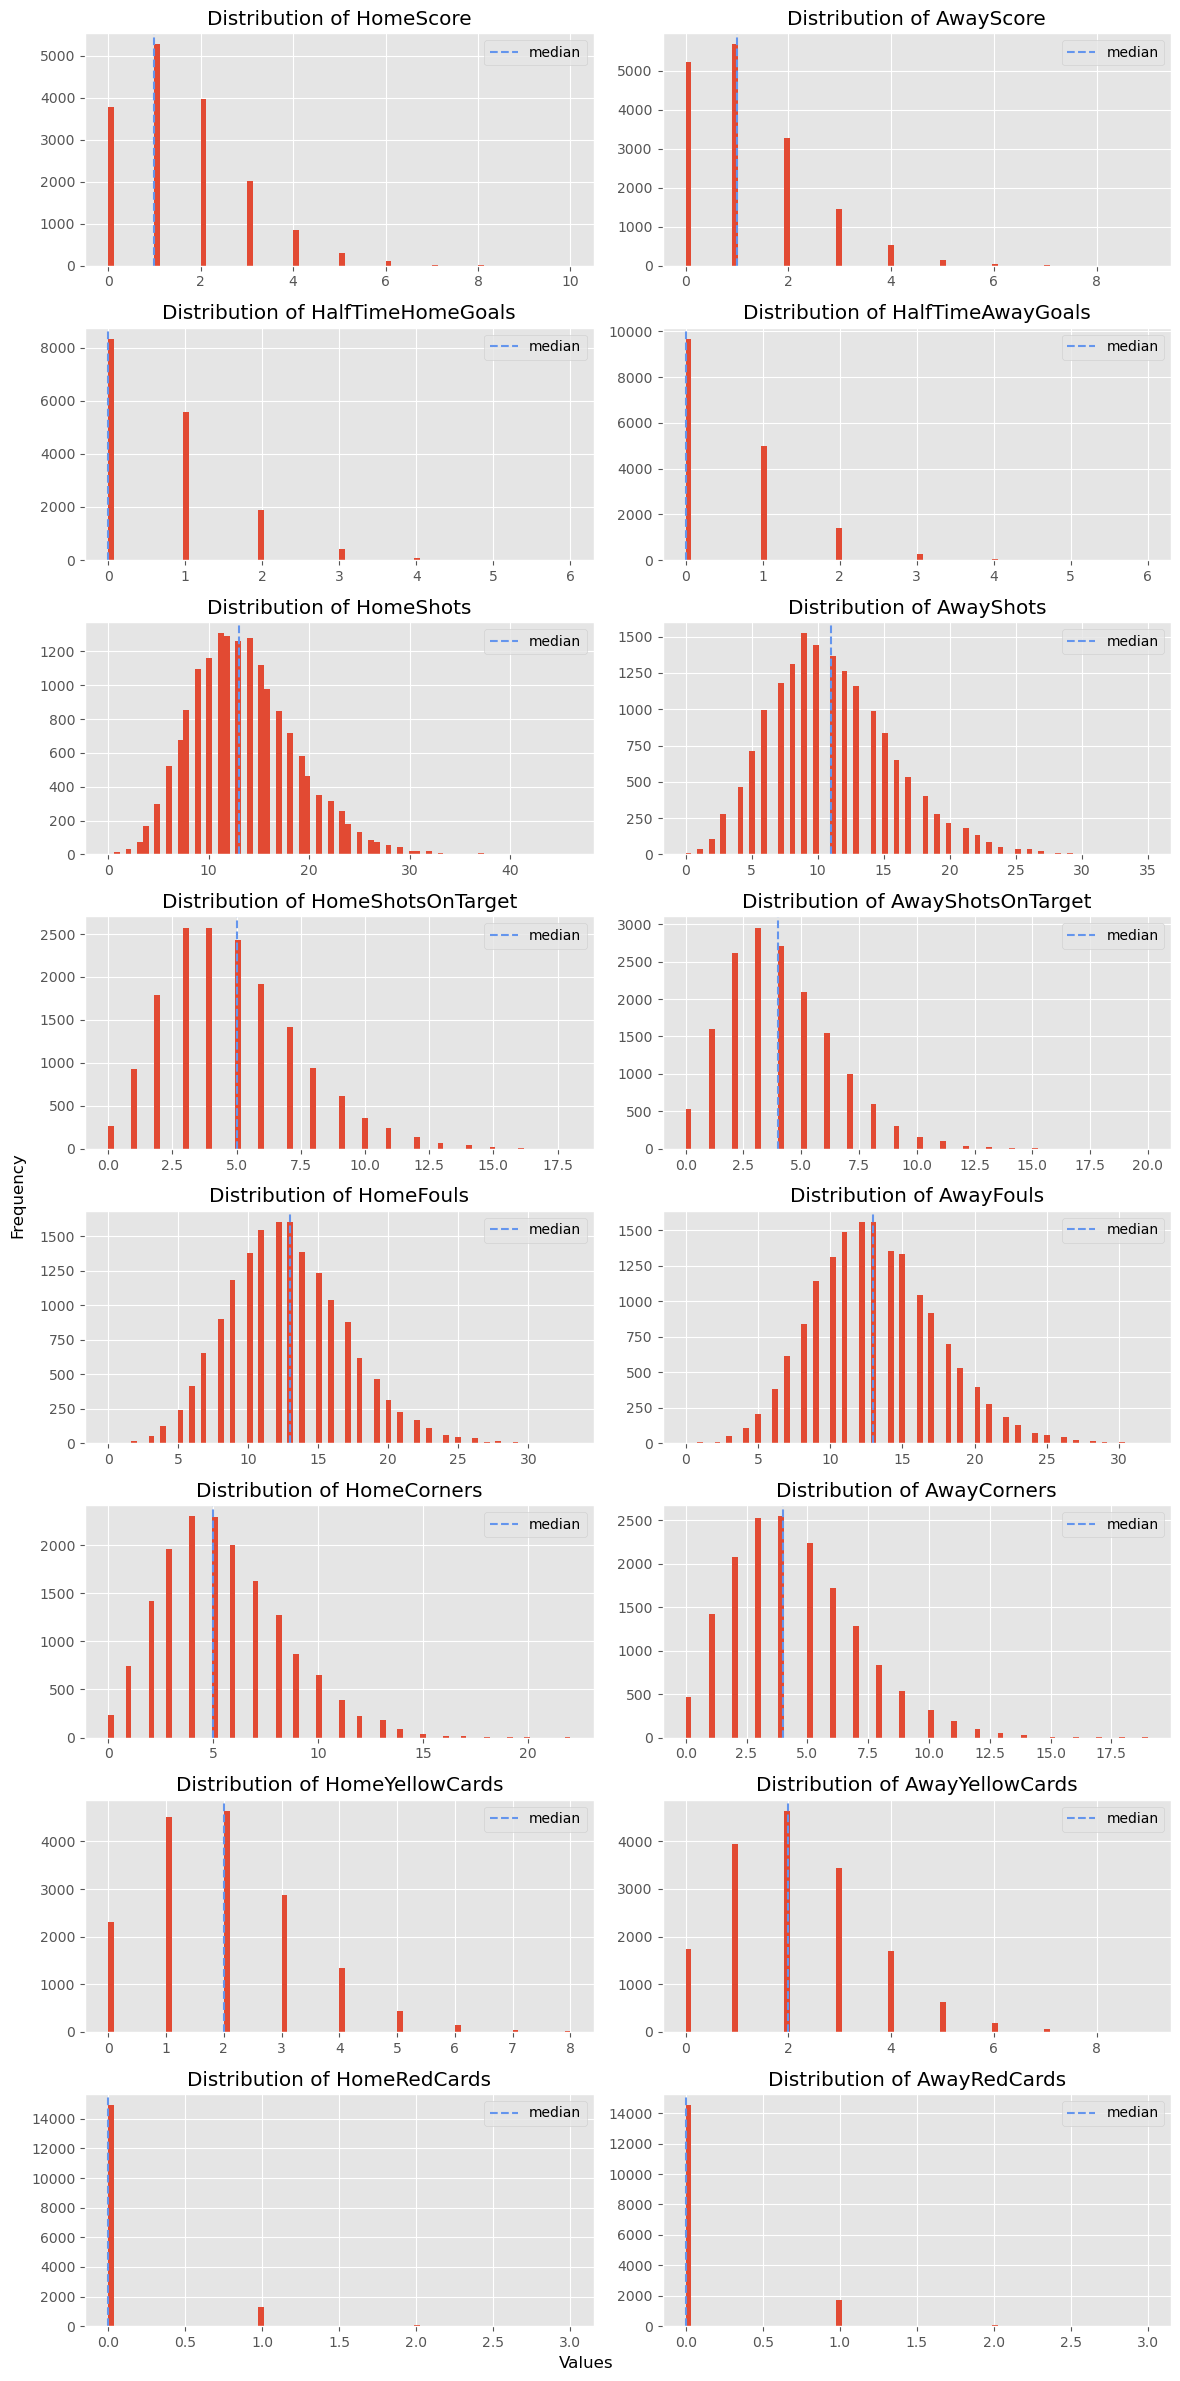

In [36]:
# Creating a figure with 8 rows and 2 columns
fig, axs = plt.subplots(8, 2, figsize=(12, 24))

# Plotting numeric columns in each subplot
for i, column in enumerate(clean_data.select_dtypes("number").columns):
    row = i // 2
    col = i % 2
    
    axs[row, col].hist(clean_data[column], bins=80)
    axs[row, col].axvline(clean_data[column].median(), 0, 1000, label="median", color="cornflowerblue", linestyle="--")
    axs[row, col].set_title(f"Distribution of {column}")
    axs[row, col].legend()
    
# Adding a common x-label and y-label to the plot
fig.supxlabel('Values')
fig.supylabel('Frequency')

# Adjustinging plot
fig.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

From the graphs above, we see a clear advantage to playing at home. While the median goals scored are level, Home Teams are more likely to score 2 or more goals at Full and Half Time. Home Teams also produce more shots and earn more corner kicks. When it comes to fouls, the distribution is quite normal, with both teams having reason to show aggression. Home teams want to please the fans and assert dominance, while away teams draw fouls in order to break down their opponents attacks. However, the Away Team does seem to have a higher frequency of fouls after the 15 foul mark. Away Teams also earn more Yellow and Red Cards. They are less likely to end a game at full time with 0 yellow cards. Away teams are more likely to earn one red card.

## Visualizing Categorical Variables<a class="anchor" id="categorical"></a>

Now, let's visualize our categorical variables. 

In [37]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['id', 'Country', 'League', 'Div', 'Season', 'HomeTeam', 'AwayTeam',
       'Result', 'HalfTimeResult'],
      dtype='object')


## Visualizing the Target Variable `Result`<a class="anchor" id="result"></a>

First, let's see the distribution of the `Result`'s. As seen with the numerical variables, we expect the Home Team to have a higher proportion of wins at the end of the match

In [38]:
# Filter the dataset to include only games where the home team won
home_win_df = data1[data1["Result"] == "H"]

# Calculate the proportion of games where the home team won
home_win_prop = len(home_win_df) / len(data1)

print("Proportion of games where the home team won: {:.2f}".format(home_win_prop))

Proportion of games where the home team won: 0.45


First let's look at the proportions of winning teams after 90 minutes and compare them to matches when the team is leading at half:

<div>
<img src="https://i.ibb.co/G5qjYb6/Proportions-of-winning-teams-after-90-minutes.png" width="800"/>
</div>

The home team wins 45% of the time to the away team's 30%, while 25% of matches end in a draw. A home advantage does seem to exist for the teams in this dataset. Next, let's take a look at Half-Time to Full-Time results. On the left hand side we see the Half-Time Result and in the middle, the Full Time Result:

<div><img src="https://i.ibb.co/ZH6xvFy/Half-Time-vs-Full-Time-results-of-winning-teams.png" width="800"/></div>

Even when losing at half, the home team is still able to win 10% of the time compared to the away team at 71%. On the other hand, when winning at half time, the home team is able to win a comfortable 79% of the time while the away team is able to come back and win 6%. During a half time draw, the home team wins 37% of the time, higher than the chance of a game finishing in a draw at 36%. The away team only wins 26% of times when tied at half.

Let's take a look the most common teams in each league. We can group the data by `Home Team` since each team plays an even amount of home and away matches each season:

## Visualizing Team Performance<a class="anchor" id="teams"></a>

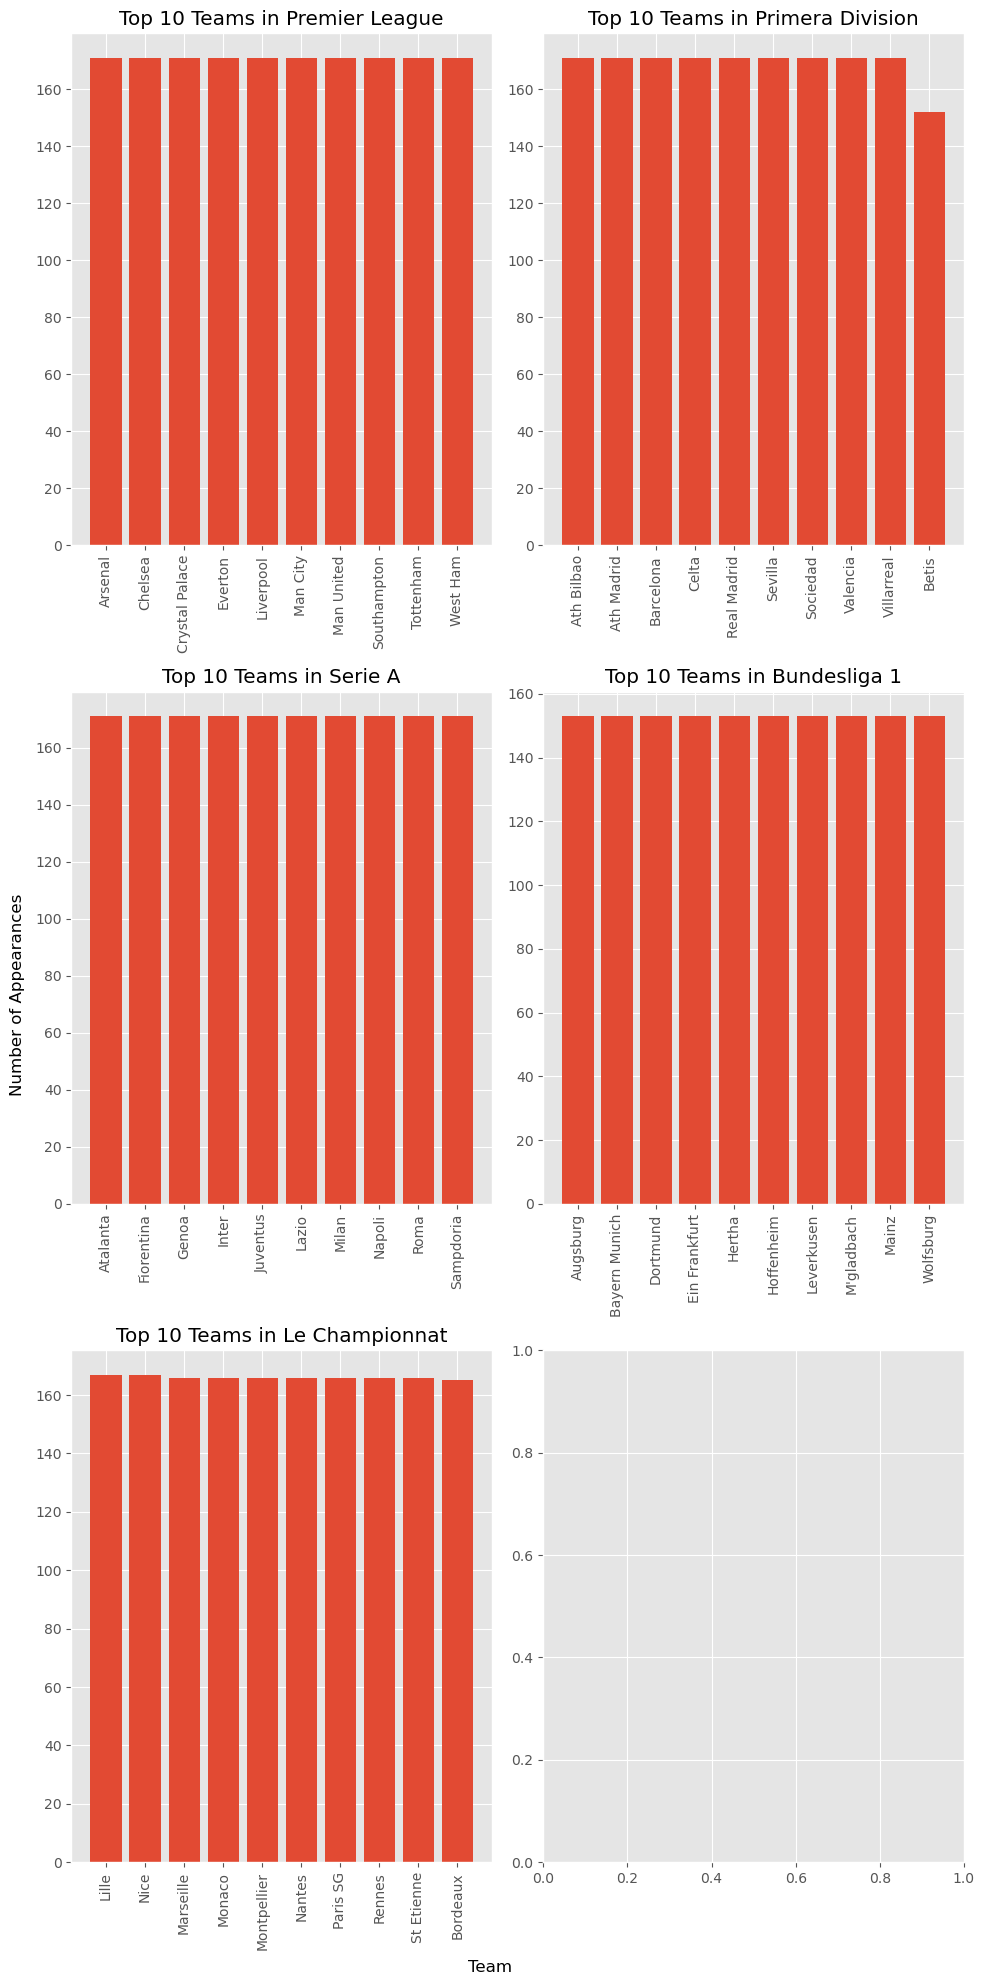

In [39]:
# Group data by league and count the number of occurrences of each team
league_counts = clean_data.groupby('League')['HomeTeam'].value_counts()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the top 10 teams
for i, league in enumerate(clean_data['League'].unique()):
    top_teams = league_counts[league].nlargest(10)
    axs[i//2, i%2].bar(top_teams.index, top_teams.values)
    axs[i//2, i%2].set_title(f'Top 10 Teams in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)



# Add a common x-label and y-label to the plot
fig.supxlabel('Team')
fig.supylabel('Number of Appearances')

# Adjusting plot
plt.tight_layout()
plt.show()


As expected, the majority of teams in each league are represented over 160 times. Although there is a concept of "Relegation", where the bottom 3 teams are relegated to second division, while the top 3 teams from second division graduate to first. From these graphs, we see that the top teams tend to never get relegated. This is because they have the backing of a generous owner (or oil company) and can buy the best players in the world while also developing their academies. This ensures they remain competitive in the premier leagues.

Now let's take a look at which teams have won the most games when playing at home:

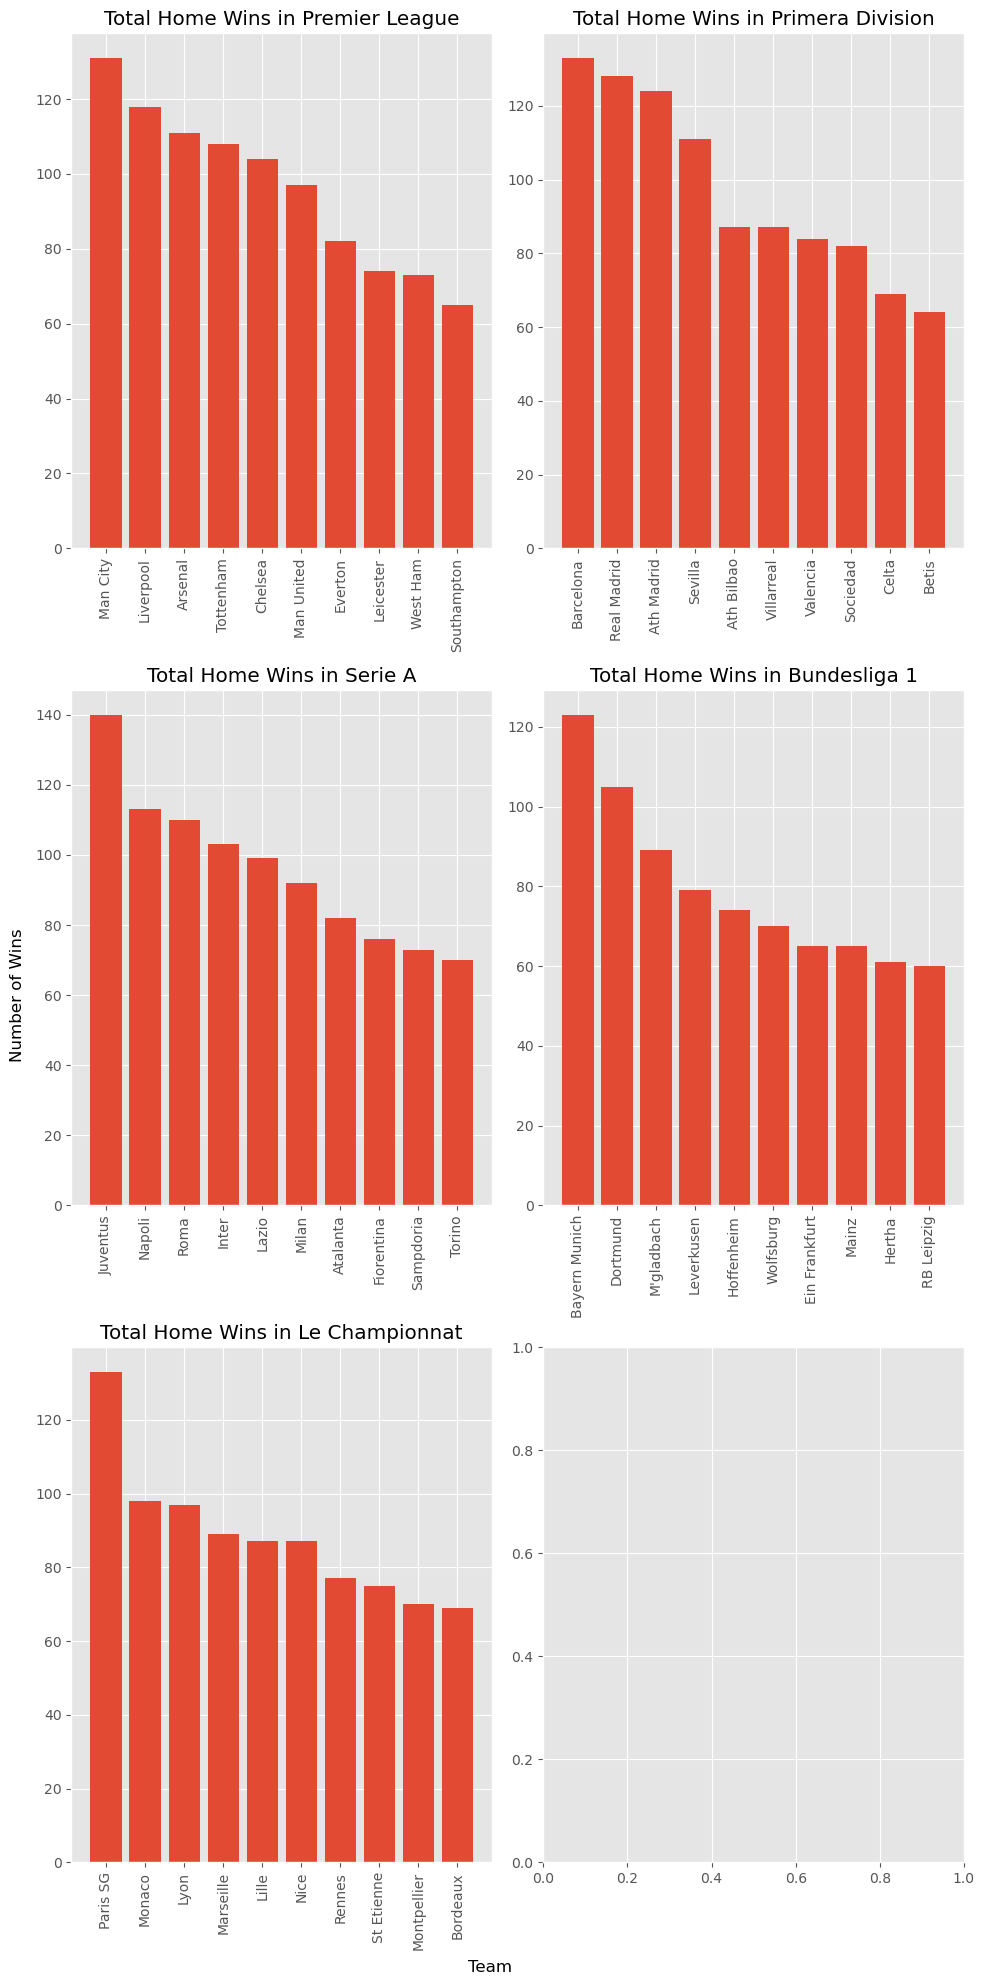

In [40]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'H'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Home Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)
    
# Add a common x-label and y-label to the plot
fig.supxlabel('Team')
fig.supylabel('Number of Wins')

# Adjusting the layout
plt.tight_layout()
plt.show()

The most successful Home Team in the dataset seems to be Juventus with 140 wins at home, while the other top teams hover around the 130 mark. In England, Manchester City is the most successful home team, in Spain it's Barcelona, Germany it's Bayern Munich, and in France it's Paris St. Germain. 

Which team's have won the most playing away:

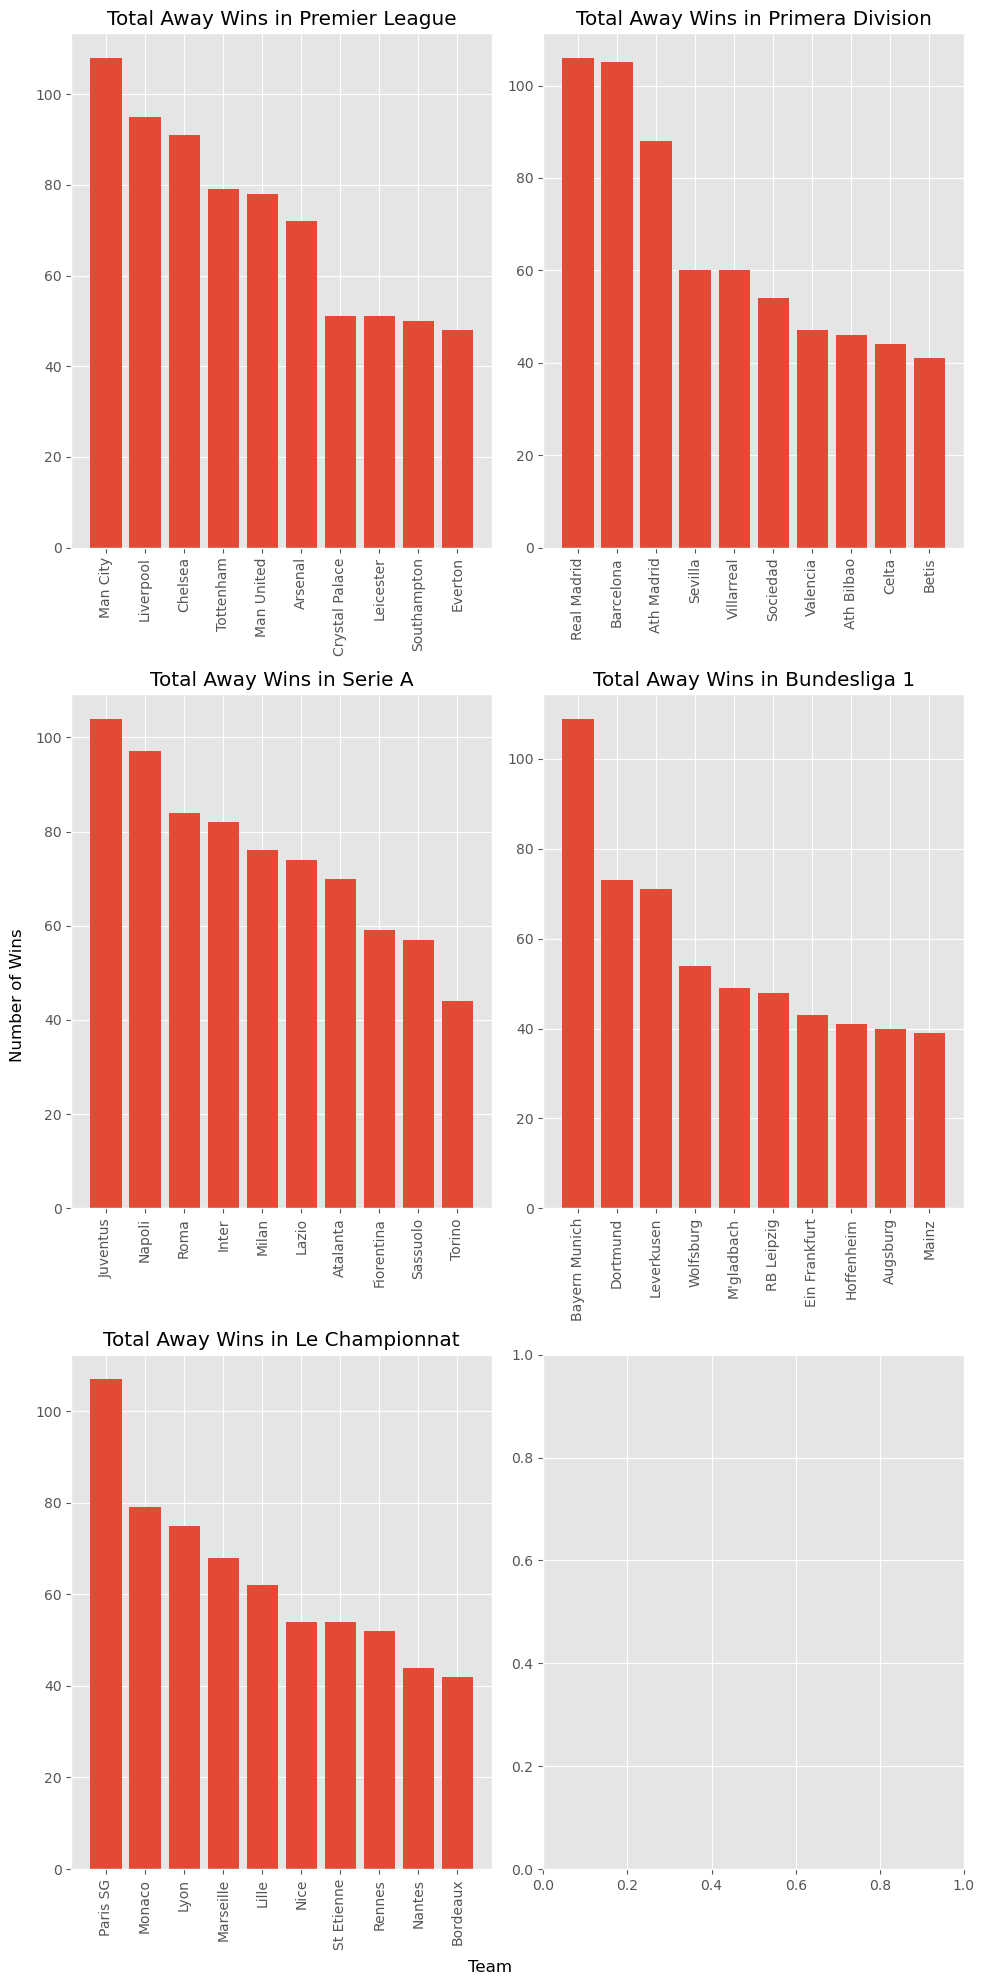

In [41]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'A'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Total Away Wins in {league}')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)

# Add a common x-label and y-label to the plot
fig.supxlabel('Team')
fig.supylabel('Number of Wins')

# Adjusting the layout
plt.tight_layout()
plt.show()

Away results show a similar pattern with aforementioned teams winning the most away matches. The only exception is Real Madrid in La Liga who have more away wins than Barcelona. This is impressive, because Barcelona underwent their golden generation where they won the majority of trophies, so for Madrid to have more Away Wins under those conditions is very impressing. Now, let's look at the Draws:

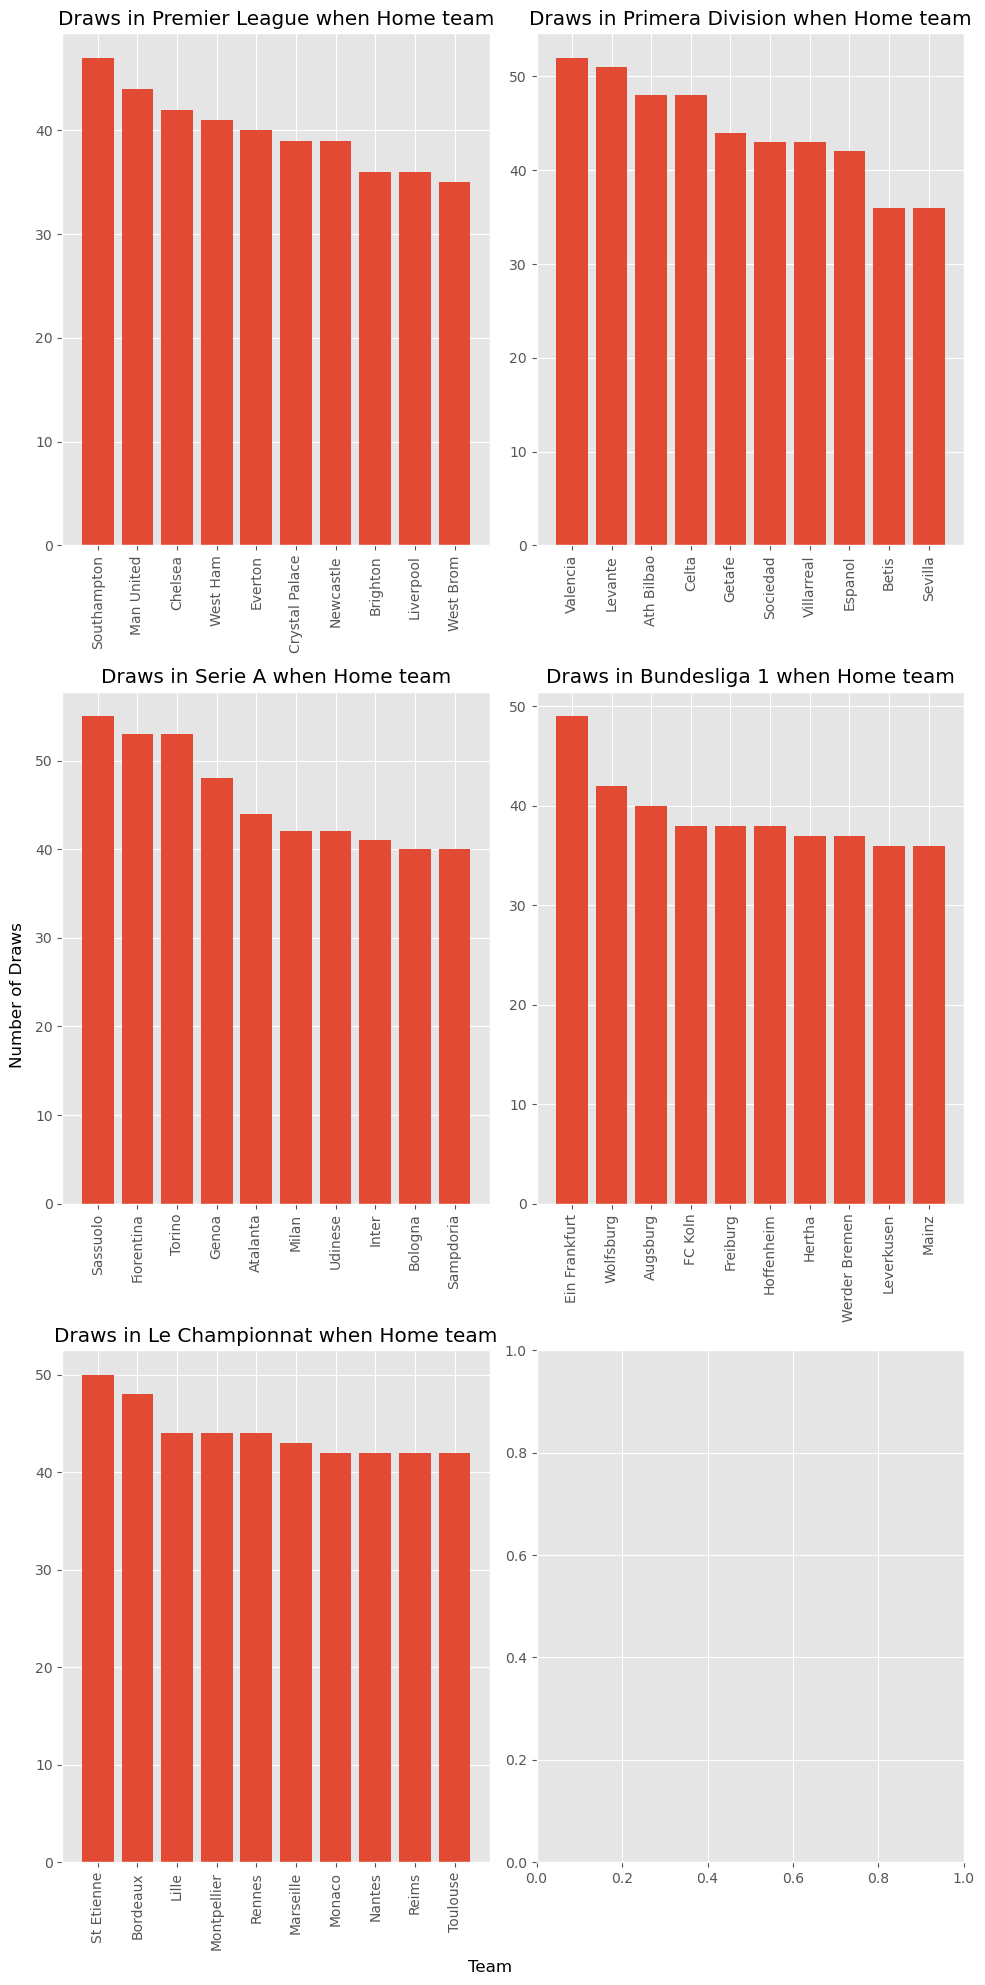

In [42]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'D'].groupby(['League', 'HomeTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Draws in {league} when Home team')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)

# Add a common x-label and y-label to the plot
fig.supxlabel('Team')
fig.supylabel('Number of Draws')

# Adjusting the layout
plt.tight_layout()
plt.show()

Looking at draws, we see a lot of mid table teams present. These are teams that don't win as many games and usually structure their formation to play for a draw to prevent losing, especially against stronger opposition. Sassuolo in Serie A is the standout team with around 56 Home draws in the dataset.

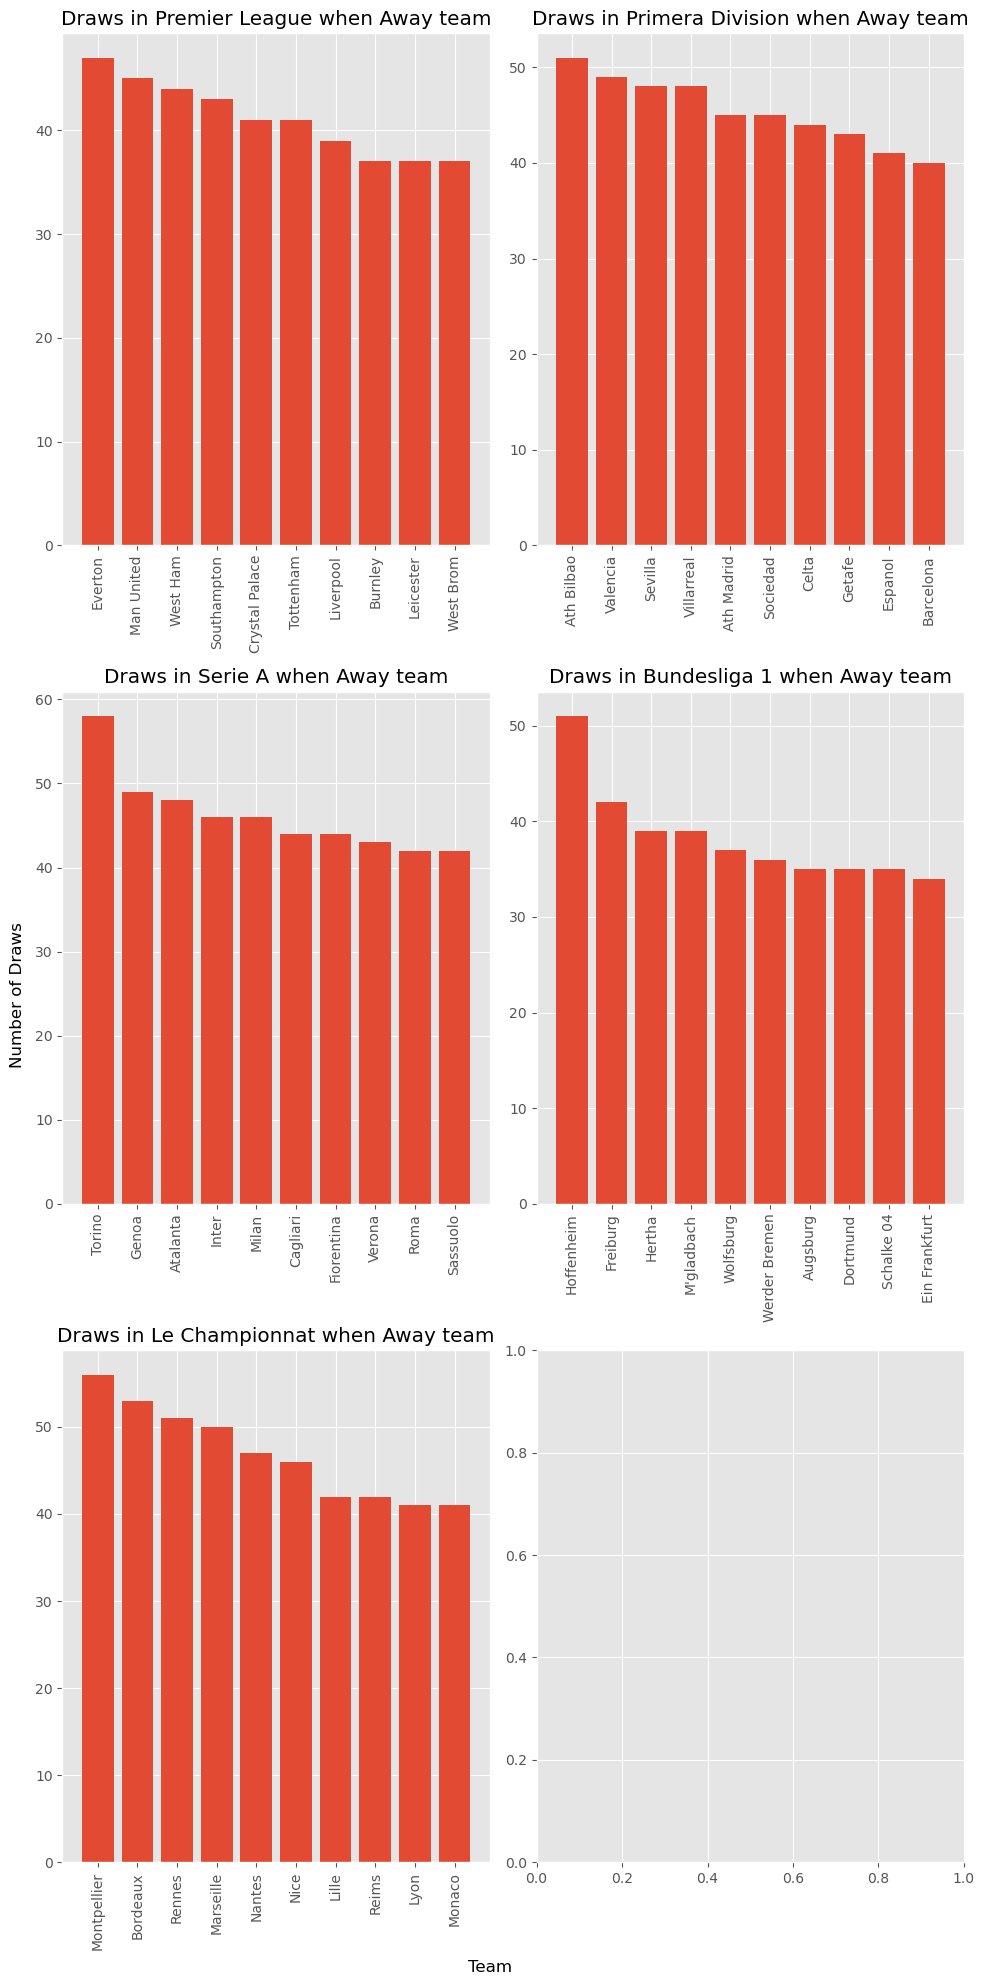

In [43]:
# Group data by league and team, and sum the number of wins
league_team_wins = clean_data[clean_data['Result'] == 'D'].groupby(['League', 'AwayTeam'])['Result'].count()

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 20))

# Loop over each league and plot the total number of wins for each team
for i, league in enumerate(clean_data['League'].unique()):
    league_wins = league_team_wins[league].nlargest(10)
    axs[i//2, i%2].bar(league_wins.index, league_wins.values)
    axs[i//2, i%2].set_title(f'Draws in {league} when Away team')
    axs[i//2, i%2].tick_params(axis='x', labelrotation=90)

# Add a common x-label and y-label to the plot
fig.supxlabel('Team')
fig.supylabel('Number of Draws')

# Adjusting the layout
plt.tight_layout()
plt.show()

The away numbers for draws are slightly different, with Torino in Serie A taking the top spot at around 58 draws. Sassuolo, the team with the most home draws, is in 10th. Serie A is known for being an extremely tactical and defensive league, so it's no surprise that manager shift their strategy to play for a draw in order to gain 1 point instead of 0. It is the equivalent of playing chess on the soccer pitch.

Now let's take a look at the amount of goals scored:

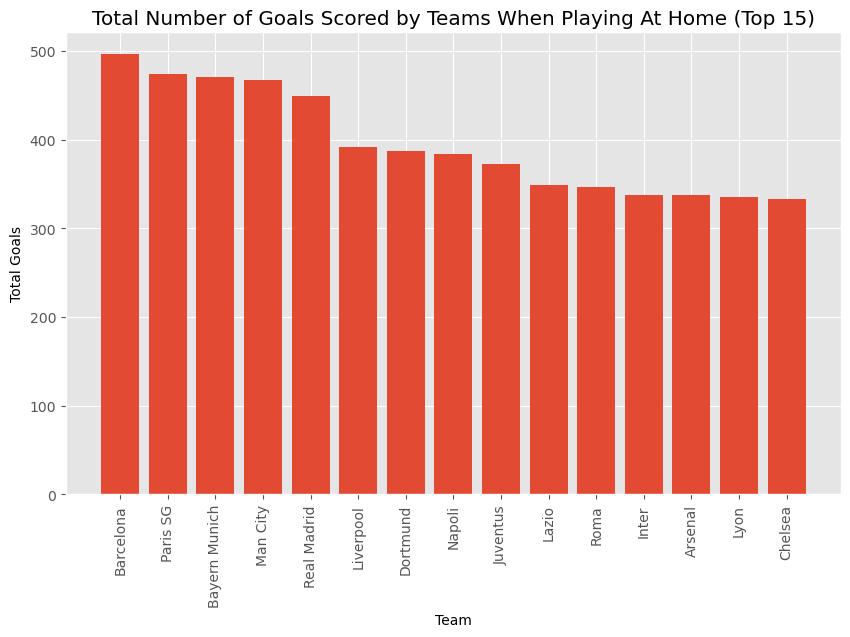

In [44]:
#grouping by goals scored for home team and selecting top 15 results
goals_df = clean_data.groupby('HomeTeam')['HomeScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='HomeScore', ascending=False)
top15_df = goals_df.head(15)

#plotting results
plt.figure(figsize=(10, 6))
plt.bar(top15_df['HomeTeam'], top15_df['HomeScore'])
plt.title('Total Number of Goals Scored by Teams When Playing At Home (Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [45]:
#printing values in a table for comprehension
team_scores = clean_data.groupby('HomeTeam').agg({'HomeScore': 'sum'})
sorted_scores = team_scores.sort_values(by='HomeScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)

               HomeScore
HomeTeam                
Barcelona          496.0
Paris SG           474.0
Bayern Munich      470.0
Man City           467.0
Real Madrid        449.0
Liverpool          391.0
Dortmund           387.0
Napoli             384.0
Juventus           372.0
Lazio              349.0
Roma               347.0
Inter              338.0
Arsenal            338.0
Lyon               335.0
Chelsea            333.0


It is no surprise that Barcelona is the team with the most goals at home and soccer fans know that this is due to Barcelona’s golden generation with prime Lionel Messi, who helped Barcelona win 5 Spanish titles from 2012 – 2019. It's impressive to see that Barcelona has scored 24 more goals than the next highest scoring team, PSG. Bayern Munich, and Man City and Real Madrid round out the top 5.

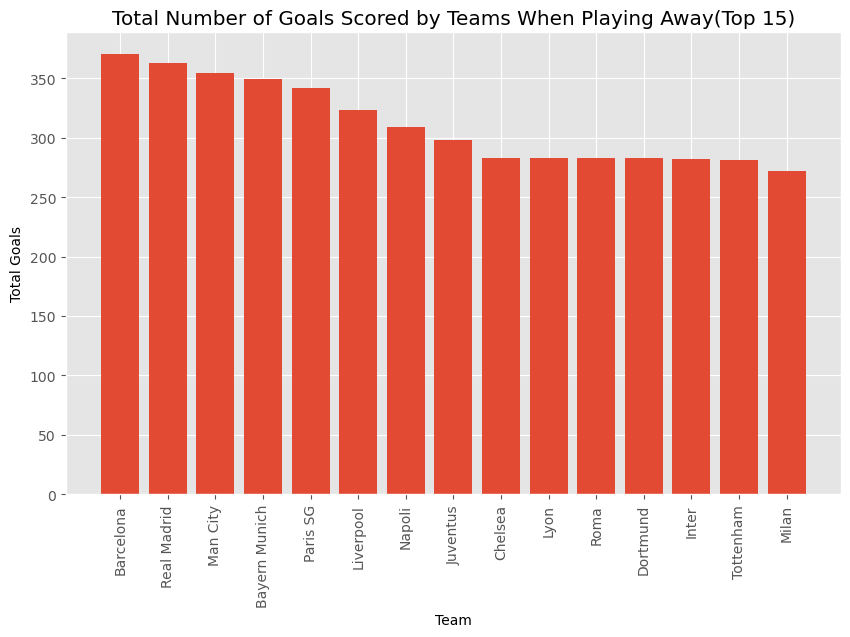

In [46]:
#grouping away goals and selecting top 15
goals_df = data1.groupby('AwayTeam')['AwayScore'].sum().reset_index()
goals_df = goals_df.sort_values(by='AwayScore', ascending=False)
top15_df = goals_df.head(15)

#plotting
plt.figure(figsize=(10, 6))
plt.bar(top15_df['AwayTeam'], top15_df['AwayScore'])
plt.title('Total Number of Goals Scored by Teams When Playing Away(Top 15)')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

In [47]:
#printing values in table
team_scores = clean_data.groupby('AwayTeam').agg({'AwayScore': 'sum'})
sorted_scores = team_scores.sort_values(by='AwayScore', ascending=False)
head = sorted_scores.head(15)
head.value_counts()
print(head)

               AwayScore
AwayTeam                
Barcelona          370.0
Real Madrid        363.0
Man City           354.0
Bayern Munich      349.0
Paris SG           342.0
Liverpool          323.0
Napoli             309.0
Juventus           298.0
Chelsea            283.0
Lyon               283.0
Roma               283.0
Dortmund           283.0
Inter              282.0
Tottenham          281.0
Milan              272.0


In the Away goals, we can immediately see that the number of goals is less, another point in favor of home field advantage. Barcelona scored 496 goals at home but managed only 370 when playing away. The order of the teams changes, with Real Madrid jumping to second spot, only 7 goals behind Barcelona. Manchester City is in third with Bayern Munich fourth. Real Madrid is the strongest away team in our dataset as they surpassed Barcelona in wins and are second in goals scored. Paris St. Germain on the other hand, were second in goals at home but drop to 5th when away. Sometimes that travel distance and jeering fans can really take a toll on performance.

Now that we've visuazlied our data, let's make a few more adjustments before moving into feature engineering. First, let's drop unnecessary categories. We don't need the `id` category since we won't be using it for modelling as well as the `Div` category. The info in the division column is no longer relevant, as all of our leagues are at the top flight of the pyramid. Let's check the `id` column:

In [48]:
#checking unique entries in ID
clean_data.id.nunique()

16332

Every match has its own unique id. We can drop it:

In [49]:
#dropping ID
clean_data = clean_data.drop('id', axis=1)

Now let's check `Div`:

In [50]:
#checking unique values in Div. They don't represent anyting valuable for our model
clean_data.Div.unique()

array(['E0', 'SP1', 'I1', 'D1', 'F1'], dtype=object)

It shows the first letter of the league followed by the division. They are all 1 except for England, possibly a typo.
We can drop this as it won't be useful for modeling:

In [51]:
#dropping Div
clean_data = clean_data.drop('Div', axis=1)

Now that we've dropped `ID` and `Div`, let's see what else we can do with our non-numeric categories:

In [52]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['Country', 'League', 'Season', 'HomeTeam', 'AwayTeam', 'Result',
       'HalfTimeResult'],
      dtype='object')


Let's focus on the `Country` and `League`:

In [53]:
#printing countries
print(f"The countries in the dataset are: {clean_data.Country.unique()}")

#printing leagues
print(f"The leagues in the dataset are: {clean_data.League.unique()}")

The countries in the dataset are: ['England' 'Spain' 'Italy' 'Germany' 'France']
The leagues in the dataset are: ['Premier League' 'Primera Division' 'Serie A' 'Bundesliga 1'
 'Le Championnat']


We can see that the Leagues and the Countries contain the same data. We can drop the league since it conveys less general info. We'll also save our cleaner dataset as a checkpoint and move on to Feature Engineering.

In [54]:
#dropping league
clean_data = clean_data.drop('League', axis=1)

In [55]:
#saving data
clean_data.to_csv('Euro Football Cleaner.csv', index=False)

## Feature Engineering<a class="anchor" id="feature"></a>

Feature engineering is essential for our purpose as it helps to extract the most relevant information from the available data and create new features that can improve predictions.

In this section, we will extract the year, month, and day from the `Date`, create dummy variables from each home and away team, as well as seasons, and countries. We will also engineer a few features that will hopefully improve the accuracy of the model.

## Extracting Date<a class="anchor" id="date"></a>

First, let's extract the year-month-day from the `Date` column. 

In [56]:
# extracting year
clean_data['Year'] = clean_data['Date'].dt.year

# extracting month
clean_data['Month'] = clean_data['Date'].dt.month
# extracting day
clean_data['Day'] = clean_data['Date'].dt.day

#dropping the date column
clean_data.drop('Date', axis=1, inplace=True)

# checking results
clean_data.head()

,Country,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Year,Month,Day
380,England,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,...,18.0,4.0,3.0,4.0,5.0,1.0,0.0,2013,8,17
381,England,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,...,11.0,12.0,6.0,1.0,1.0,0.0,0.0,2013,8,17
382,England,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,...,10.0,6.0,8.0,2.0,0.0,0.0,0.0,2013,8,17
383,England,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,...,14.0,6.0,1.0,0.0,3.0,0.0,0.0,2013,8,17
384,England,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,...,10.0,7.0,4.0,1.0,3.0,0.0,0.0,2013,8,17


## Creating Dummy Variables with `HomeTeam`<a class="anchor" id="home"></a>

Now let's look at `HomeTeam`:

In [57]:
#checking unique home teams
clean_data.HomeTeam.nunique()

158

We have 158 unique home teams in the dataset. Since they are categorical variables, we will need to preserve them in numerical info. One way to do this is to OneHotEncode them into dummy variables. This means that each match will have a 1 or 0 corresponding to the teams column. If the team is playing in the match, the number will be 1, otherwise 0. Let's go ahead and do this below:

In [58]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
HomeTeams = pd.DataFrame(clean_data['HomeTeam'])
encoded = ohe.fit_transform(HomeTeams)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#Adding "HomeTeam_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["HomeTeam_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

In [59]:
#sanity check
clean_data.head()

,Country,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeTeam_Vallecano,HomeTeam_Venezia,HomeTeam_Verona,HomeTeam_Villarreal,HomeTeam_Watford,HomeTeam_Werder Bremen,HomeTeam_West Brom,HomeTeam_West Ham,HomeTeam_Wolfsburg,HomeTeam_Wolves
0,England,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,...,0,0,0,0,0,0,0,0,0,0
1,England,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,...,0,0,0,0,0,0,0,0,0,0
2,England,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,...,0,0,0,0,0,0,0,0,0,0
3,England,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,...,0,0,0,0,0,0,0,0,0,0
4,England,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,...,0,0,0,0,0,0,0,0,0,0


Great, every home team now has their own column. Let's do the same with the away teams.

## Creating Dummy Variables with `AwayTeam`<a class="anchor" id="away"></a>

In [60]:
#checking unique away teams
clean_data.AwayTeam.nunique()

158

We have the same amount of AwayTeams which means that every team is represented completely.

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
AwayTeams = pd.DataFrame(clean_data['AwayTeam'])
encoded = ohe.fit_transform(AwayTeams)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "AwayTeam_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["AwayTeam_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

Now we can go ahead and do the same for `Season` and `Country`.

## Creating Dummy Variables for `Season`<a class="anchor" id="season"></a>

In [62]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Seasons = pd.DataFrame(clean_data['Season'])
encoded = ohe.fit_transform(Seasons)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "Season_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["Season_" + season for season in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping Season category
#clean_data = clean_data.drop(columns=['Season'])

## Creating Dummy Variables for `Country`<a class="anchor" id="country"></a>

In [63]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
Countries = pd.DataFrame(clean_data['Country'])
encoded = ohe.fit_transform(Countries)
encoded

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

#Adding "Country_" to each team
categories = ohe.categories_[0] 
categories_with_prefix = ["Country_" + team for team in categories]

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories_with_prefix, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

#dropping Country category
clean_data = clean_data.drop(columns=['Country'])

In [64]:
#selecting object datatype
objects = clean_data.select_dtypes("object").columns
print(objects)

Index(['Season', 'HomeTeam', 'AwayTeam', 'Result', 'HalfTimeResult'], dtype='object')


In [65]:
clean_data.head()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2017-2018,Season_2018-2019,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain
0,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,0,0,0,0,0,1,0,0,0,0
1,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,0,0,0,0,0,1,0,0,0,0
2,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,0,0,0,0,0,1,0,0,0,0
3,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,0,0,0,0,0,1,0,0,0,0
4,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,0,0,0,0,0,1,0,0,0,0


## Creating `Form` Category<a class="anchor" id="form"></a>

Let's create a couple of categories to signify the team's form which will subtract the goals scored from goals conceded in the past 5 games. A team in good form will have a high positive value while a struggling team will have a negative value. This will allow our model to see which teams have been playing well or performing poorly.

We will do this by creating a function that calculates the scores from the past 5 games and updates them with the current match results. Since the form will only account for the last 5 matches, each team will start with 0. The form will be computed for both the home and away team in a dictionary, ensuring that each unique team has their own values. Afterwards, the rows will be run through the calculate_form function and two new categories will be created. Each unique team will have an on-going form calculated whether they're playing at home or away.

In [66]:
def calculate_form(row):
    
    """
    
    This function calculates the current form of the home team and away team based on their last 5 matches.

    A dictionary representing the current match with keys 'HomeTeam', 'AwayTeam', 'HomeScore', and 'AwayScore'
    
    Returns a tuple containing the current form of the home team and away team, respectively.

    The function updates the home_team_form_dict and away_team_form_dict with the current match result,
    and computes the sum of the last 5 scores for each team to determine their current form. 
    If a team has played less than 2 matches, their form is set to 0.
    
    """
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    home_team_score = row['HomeScore'] - row['AwayScore']
    away_team_score = row['AwayScore'] - row['HomeScore']

    # Update the home_team_form_dict and away_team_form_dict with the current match result
    if home_team not in home_team_form_dict:
        home_team_form_dict[home_team] = [0] * 5
    home_team_form_dict[home_team].append(home_team_score)

    if away_team not in away_team_form_dict:
        away_team_form_dict[away_team] = [0] * 5
    away_team_form_dict[away_team].append(away_team_score)

    # Compute the home team form and away team form for the current match
    home_team_form = sum(home_team_form_dict[home_team][-5:])
    away_team_form = sum(away_team_form_dict[away_team][-5:])

    # If the team has played less than 2 match, set the form to 0
    if len(home_team_form_dict[home_team]) < 2:
        home_team_form = 0
    if len(away_team_form_dict[away_team]) < 2:
        away_team_form = 0

    return home_team_form, away_team_form

# Initialize the home_team_form_dict and away_team_form_dict with 0s for each team
home_team_form_dict = {team: [] for team in clean_data['HomeTeam'].unique()}
away_team_form_dict = {team: [] for team in clean_data['AwayTeam'].unique()}

# Create two new columns "HomeTeamForm" and "AwayTeamForm" containing the form for each team
clean_data[['HomeTeamForm', 'AwayTeamForm']] = clean_data.apply(lambda row: pd.Series(calculate_form(row)), axis=1)

Let's check to make sure the function has created the Form columns. They should be 0 when we show the head because the team's have yet to play any games and return a positive and negative value when we call tail to show whether team has scored more goals than conceded or the reverse.

In [67]:
clean_data.head()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
0,2013-2014,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,...,0,0,0,1,0,0,0,0,0.0,0.0
1,2013-2014,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,...,0,0,0,1,0,0,0,0,0.0,0.0
2,2013-2014,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,...,0,0,0,1,0,0,0,0,0.0,0.0
3,2013-2014,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,...,0,0,0,1,0,0,0,0,0.0,0.0
4,2013-2014,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,...,0,0,0,1,0,0,0,0,0.0,0.0


In [68]:
clean_data.tail()

,Season,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,HomeShots,...,Season_2019-2020,Season_2020-2021,Season_2021-2022,Country_England,Country_France,Country_Germany,Country_Italy,Country_Spain,HomeTeamForm,AwayTeamForm
16327,2021-2022,Lorient,Troyes,1.0,1.0,D,0.0,1.0,A,17.0,...,0,0,1,0,1,0,0,0,1.0,-2.0
16328,2021-2022,Marseille,Strasbourg,4.0,0.0,H,1.0,0.0,H,17.0,...,0,0,1,0,1,0,0,0,5.0,-4.0
16329,2021-2022,Nantes,St Etienne,1.0,1.0,D,1.0,0.0,H,12.0,...,0,0,1,0,1,0,0,0,2.0,-8.0
16330,2021-2022,Paris SG,Metz,5.0,0.0,H,3.0,0.0,H,27.0,...,0,0,1,0,1,0,0,0,10.0,-13.0
16331,2021-2022,Reims,Nice,2.0,3.0,A,2.0,0.0,H,5.0,...,0,0,1,0,1,0,0,0,-3.0,-3.0


Everything is working correctly and we see the form for each team for each row, which should help us increase our prediction accuracy. Now let's run a basic Logistic Regression to see how well our dataset performs on the model.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#setting up variables
X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "HomeTeam", "AwayTeam", "Season"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42, stratify=y_remainder)

#fitting logistic regression
logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

#predicting on validation
y_pred = logreg.predict(X_val)

#scoring on validation
score = logreg.score(X_val, y_val)
scoretrain = logreg.score(X_train, y_train)
print("Accuracy on train set: {:.2f}%".format(scoretrain * 100))
print("Accuracy on validation set: {:.2f}%".format(score * 100))

Accuracy on train set: 68.56%
Accuracy on validation set: 64.46%


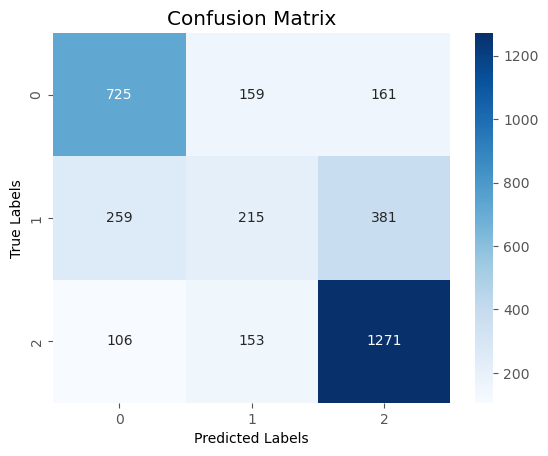

              precision    recall  f1-score   support

           A       0.67      0.69      0.68      1045
           D       0.41      0.25      0.31       855
           H       0.70      0.83      0.76      1530

    accuracy                           0.64      3430
   macro avg       0.59      0.59      0.58      3430
weighted avg       0.62      0.64      0.62      3430



In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#predicting on test 
y_pred = logreg.predict(X_val)

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_val, y_pred))

We achieved a validation 64% accuracy, however our model is not good at predicting draws. It only identified 26% of them. Perhaps we can create a feature that will help us deal with this.

## Creating `DrawsLast3` column<a class="anchor" id="draws"></a>

Let's create a function that will look at each teams past 3 matches and calculate the number of draws. It will append them to a dictionary and create two columns which will list the amount of draws each team had in their last 3 matches.

In [71]:
def calculate_draws(row):
    
    """
    This function takes a row of data and calculates the number of draws 
    for each team in their last three matches, excluding the current match.

    Args:
    A row of data from a football match dataset containing the columns 'HomeTeam', 'AwayTeam', 
    and 'Result'. 'Result' is the outcome of the match and can be 
    'H' (home team wins), 'A' (away team wins), or 'D'(draw).

    Returns:
    A tuple containing the number of draws for the home team and away team in their last three matches, 
    excluding the current match.
    """
    
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['Result']
    
    # Update the home_team_draw_dict and away_team_draw_dict with the current match result
    if home_team not in home_team_draw_dict:
        home_team_draw_dict[home_team] = [0] * 3
    if result == "D":
        home_team_draw_dict[home_team].append(1)
    else:
        home_team_draw_dict[home_team].append(0)

    if away_team not in away_team_draw_dict:
        away_team_draw_dict[away_team] = [0] * 3
    if result == "D":
        away_team_draw_dict[away_team].append(1)
    else:
        away_team_draw_dict[away_team].append(0)

    # Compute the number of draws for the home team and away team in the last 3 matches, excluding the current match
    home_team_draws = sum(home_team_draw_dict[home_team][-4:-1])
    away_team_draws = sum(away_team_draw_dict[away_team][-4:-1])

    # If the team has played less than 2 matches, set the number of draws to 0
    if len(home_team_draw_dict[home_team]) < 2:
        home_team_draws = 0
    if len(away_team_draw_dict[away_team]) < 2:
        away_team_draws = 0

    return home_team_draws, away_team_draws

# Initialize the home_team_draw_dict and away_team_draw_dict with 0s for each team
home_team_draw_dict = {team: [] for team in clean_data['HomeTeam'].unique()}
away_team_draw_dict = {team: [] for team in clean_data['AwayTeam'].unique()}

# Create two new columns "HomeTeamDraws" and "AwayTeamDraws" containing the number of draws for each team
clean_data[['HomeTeamDrawsLast3', 'AwayTeamDrawsLast3']] = clean_data.apply(lambda row: pd.Series(calculate_draws(row)), axis=1)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "HomeTeam", "AwayTeam", "Season"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42, stratify=y_remainder)

logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

score = logreg.score(X_val, y_val)
scoretrain = logreg.score(X_train, y_train)

print("Accuracy on train set: {:.2f}%".format(scoretrain * 100))
print("Accuracy on validation set: {:.2f}%".format(score * 100))

Accuracy on train set: 68.78%
Accuracy on validation set: 64.46%


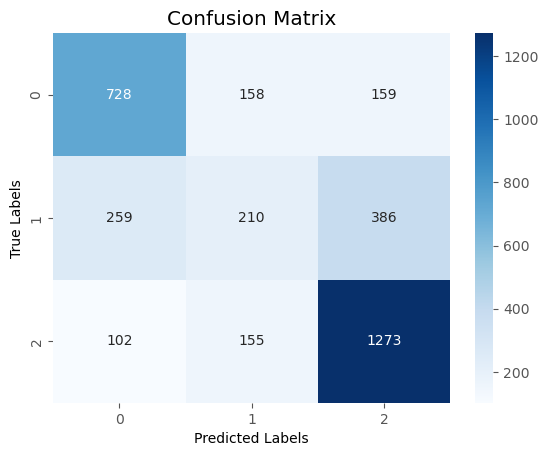

              precision    recall  f1-score   support

           A       0.67      0.70      0.68      1045
           D       0.40      0.25      0.30       855
           H       0.70      0.83      0.76      1530

    accuracy                           0.64      3430
   macro avg       0.59      0.59      0.58      3430
weighted avg       0.62      0.64      0.62      3430



In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#predicting on test 
y_pred = logreg.predict(X_val)

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_val, y_pred))

After implementing the draws columns, our accuracy goes down by 1%. The recall for both Home and Away wins slightly goes down while the draws remains at 25%. The correct amount of Draws even goes down by 5, so we can discard these two columns since they are creating more False Positives and False Negatives in our Home and Away wins.

In [74]:
#dropping DrawsLast3Columns
clean_data.drop(['HomeTeamDrawsLast3', 'AwayTeamDrawsLast3'], axis=1, inplace=True)

## Grouping Months into `PartsOfSeason`<a class="anchor" id="parts"></a>

Let's try making another feature where we will group the months into parts of a season. Most leagues start in August and conclude in May so we can split the season into "Beginning", "Middle", and "End". A lot of teams start the season strong and experience lull's in the middle and end so this feature can help our model recognize teams that are affected by seasonality and increase match accuracy prediction. We will first split the season into 3 parts and OneHotEncode dummy variables.

In [75]:
# creating season using lambda functions
clean_data['PartsOfSeason'] = clean_data['Month'].apply(lambda x: 'start' if x in [8, 9, 10, 11]
                                           else ('middle' if x in [12, 1, 2, 3]
                                                 else ('end'))) 


# checking results
clean_data.value_counts('PartsOfSeason')


PartsOfSeason
start     6215
middle    6115
end       4002
dtype: int64

In [76]:
# import OHE
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoderb
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
seasons = pd.DataFrame(clean_data['PartsOfSeason'])
encoded = ohe.fit_transform(seasons)

# Convert from sparse matrix to dense
dense_array = encoded.todense()
dense_array

#getting categories
ohe.categories_

[array(['end', 'middle', 'start'], dtype=object)]

In [77]:
#renaming categories
categories = ['season_end', 'season_middle', 'season_start']

# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=categories, dtype=int)

# reset the indices of the two dataframes
encoded_df = encoded_df.reset_index(drop=True)
clean_data = clean_data.reset_index(drop=True)

# concatenate the two dataframes horizontally
clean_data = pd.concat([clean_data, encoded_df], axis=1)

In [78]:
#dropping unneeded categories
clean_data = clean_data.drop(columns=['PartsOfSeason'])

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = clean_data.drop(['Result', 'HalfTimeResult', "HalfTimeHomeGoals", "HalfTimeAwayGoals", 'HomeScore', 'AwayScore', "HomeTeam", "AwayTeam", "Season"], axis=1) # Select features except target variable
y = clean_data['Result'] # Target variable

# Split the data into test and remainder sets
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_remainder, y_remainder, test_size=0.3, random_state=42, stratify=y_remainder)

logreg = LogisticRegression(max_iter=7000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_val)

score = logreg.score(X_val, y_val)
scoretrain = logreg.score(X_train, y_train)

print("Accuracy on train set: {:.2f}%".format(scoretrain * 100))
print("Accuracy on validation set: {:.2f}%".format(score * 100))

Accuracy on train set: 68.55%
Accuracy on validation set: 64.08%


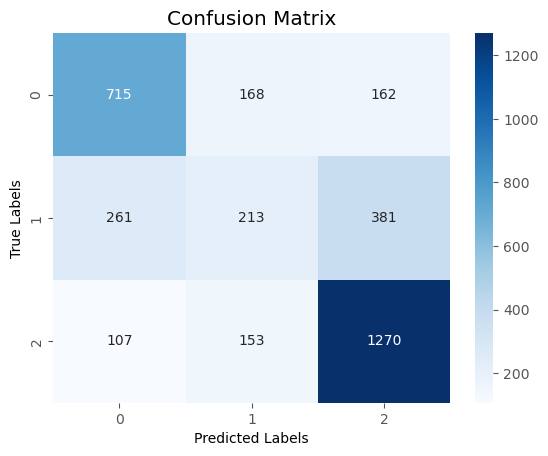

              precision    recall  f1-score   support

           A       0.66      0.68      0.67      1045
           D       0.40      0.25      0.31       855
           H       0.70      0.83      0.76      1530

    accuracy                           0.64      3430
   macro avg       0.59      0.59      0.58      3430
weighted avg       0.61      0.64      0.62      3430



In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#predicting on test 
y_pred = logreg.predict(X_val)

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#printing classification report
print(classification_report(y_val, y_pred))

These columns seem to have slightly lowered our overall accuracy, so lets revert to where we were.

In [81]:
#dropping Seasons columns
clean_data.drop(['season_end', 'season_middle', 'season_start'], axis=1, inplace=True)

Now that we completed our Feature Engineering, let's delete the categories that we used to develop our features.

In [83]:
#dropping categories
clean_data = clean_data.drop(columns=['Season', "HomeTeam", "AwayTeam"])

We now have a dataset that we can start modeling on. In the next part, we will build a pipe utilizing Scalers and various parameters to fit a Logistic Regression, SVM, and XGBoost models on our data and achieve the best prediction accuracy.

In [84]:
#saving csv for modelling
clean_data.to_csv('Euro_Football_For_Modelling.csv', index=False)

## Notebook Conclusion<a class="anchor" id="conclusion"></a>

In this notebook, we cleaned, analysed and performed feature engineering on our soccer dataset. The initial dataset contained several missing values that were addressed through dropping unnecessary leagues and seasons and filling in the other values manually. Exploratory data analysis techniques such as visualization, summary statistics were applied to gain insights into the data, identify trends, and uncover patterns. A clear Home team advantage appeared early on and was confirmed with various metrics throughout the visualization process.

Feature engineering, which is the process of selecting, extracting, and transforming features in the data to improve the performance, was a crucial step in this notebook. The goals columns, which could not be used directly due to their highly predictive nature, were used to create the team form feature. Two other features, which involved draws in last 3 games, and parts of a season were implemented, but unfortunately did not improve the model’s accuracy. They were dropped from the DataFrame. 

Now that we've finished cleaning and processing our data, let's move into modelling.  